# 🖼️ Diagrams

In [18]:
import iplantuml
from graphviz import Digraph

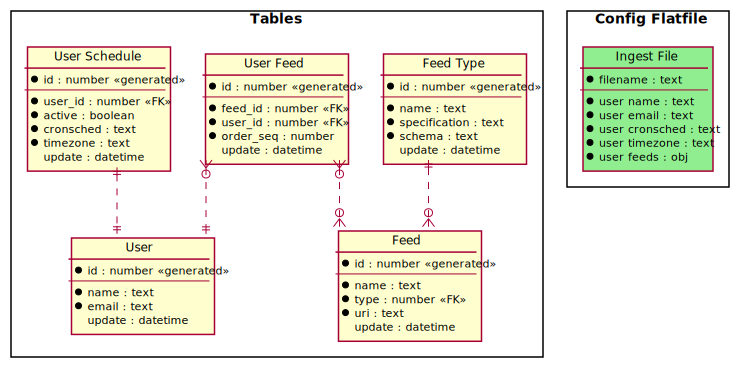

In [17]:
%%plantuml --jar --name sample_database

@startuml
' hide the spot
hide circle

' avoid problems with angled crows feet
skinparam linetype ortho

skinparam packageStyle rectangle

package Tables {
entity "Feed" as feed {
  *id : number <<generated>>
  --
  *name : text
  *type : number <<FK>>
  *uri : text
  update : datetime
}

entity "Feed Type" as feedtype {
  *id : number <<generated>>
  --
  *name : text
  *specification : text
  *schema : text
  update : datetime
}

entity "User Feed" as userfeeds {
  *id : number <<generated>>
  --
  *feed_id : number <<FK>>
  *user_id : number <<FK>>
  *order_seq : number
  update : datetime
}

entity "User" as users {
  *id : number <<generated>>
  --
  *name : text
  *email : text
  update : datetime
}


entity "User Schedule" as usersched {
  *id : number <<generated>>
  --
  *user_id : number <<FK>>
  *active : boolean
  *cronsched : text
  *timezone : text
  update : datetime
}
}

package "Config Flatfile" as flatfile{
entity "Ingest File" as ingest #lightgreen {
  *filename : text
  --
  *user name : text
  *user email : text
  *user cronsched : text
  *user timezone : text
  *user feeds : obj
}
}

feedtype ||..o{ feed
userfeeds }o..o{ feed
userfeeds }o..|| users
usersched ||..|| users
@enduml

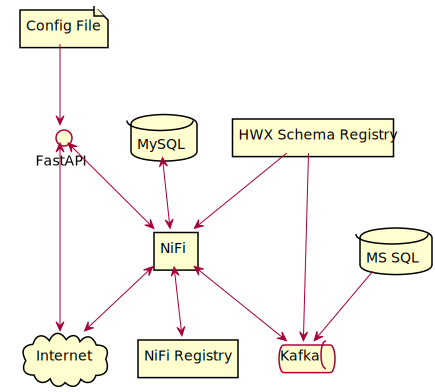

In [22]:
%%plantuml --jar --name sample_deploy

@startuml
file "Config File" as configfile
interface "FastAPI" as fastapi
rectangle "NiFi" as nifi
rectangle "NiFi Registry" as nifireg
rectangle "HWX Schema Registry" as schemareg
queue "Kafka" as kafka
database "MySQL" as mysql
database "MS SQL" as mssql
cloud "Internet" as internet

configfile --> fastapi
fastapi <--> nifi
fastapi <--> internet
nifi <--> nifireg
nifi <--> kafka
nifi <--> internet
schemareg --> nifi
schemareg --> kafka
mssql --> kafka
mysql <--> nifi
@enduml

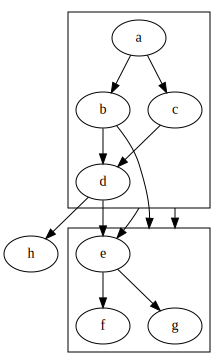

In [24]:
# referece: https://github.com/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb
# http://www.graphviz.org/pdf/dotguide.pdf Figure 20

g = Digraph('G')
g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g